# Homework 2 Zexin Ren

Import Some Packages

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [142]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

True
NVIDIA GeForce RTX 3090


Load Dataset

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170499072it [00:04, 34896794.76it/s]                               


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Question (a)
Compare CNN with Simple DNNs:

Model 1: CNN: same with the example

Model 2: Simple DNN with 0 hidden layer.

Model 3: Simple DNN with 1 hidden layer.

Model 4: Simple DNN with 2 hidden layer.

Model 5: Simple DNN with 3 hidden layer.

Model 6: Simple DNN with 4 hidden layer.



In [16]:
class ConvNet1(nn.Module):
    '''
    CNN Model 1
        Same model with the Cifar10 File
    '''
    def __init__(self):
        super().__init__()
        '''self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)'''
        self.conv_layers=nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x


conv_net_1 = ConvNet1()

In [19]:
class DNN1(nn.Module):
    '''
    Dense Model 1
        No hidden layer
    '''
    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 32 * 3,10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

dense_net_1 = DNN1()

In [22]:
class DNN2(nn.Module):
    '''
    Dense Model 2
        Only one hidden layer.
    '''
    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 32 * 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10),
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

dense_net_2 = DNN2()

In [25]:
class DNN3(nn.Module):
    '''
    Dense Model 3
        Two hidden layers
    '''
    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 32 * 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

dense_net_3 = DNN3()

In [34]:
class DNN4(nn.Module):
    '''
    Dense Model 4
        Three hidden layers
    '''
    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 32* 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

dense_net_4 = DNN4()

In [35]:
class DNN5(nn.Module):
    '''
    Dense Model 5
    Four hidden layers
    '''
    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 32 * 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

dense_net_5 = DNN5()

Training the model.

Always set number of epochs as 10, and append the accuracy on test set of each epoch. And compare them by plots.

In [17]:
'''
Train conv_net_1
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net_1.parameters(), lr=0.001, momentum=0.9)
n_epochs=10
conv_acc=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    conv_net_1.to('cuda')
    conv_net_1.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = conv_net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    conv_net_1.eval()
    conv_net_1.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = conv_net_1(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_curr=correct / total
    conv_acc.append(acc_curr)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.198
[1,  4000] loss: 1.884
[1,  6000] loss: 1.722
[1,  8000] loss: 1.591
[1, 10000] loss: 1.527
[1, 12000] loss: 1.465
Accuracy of the network on the 10000 test images: 48 %
[2,  2000] loss: 1.407
[2,  4000] loss: 1.388
[2,  6000] loss: 1.343
[2,  8000] loss: 1.333
[2, 10000] loss: 1.314
[2, 12000] loss: 1.267
Accuracy of the network on the 10000 test images: 52 %
[3,  2000] loss: 1.233
[3,  4000] loss: 1.227
[3,  6000] loss: 1.216
[3,  8000] loss: 1.195
[3, 10000] loss: 1.207
[3, 12000] loss: 1.166
Accuracy of the network on the 10000 test images: 58 %
[4,  2000] loss: 1.110
[4,  4000] loss: 1.113
[4,  6000] loss: 1.125
[4,  8000] loss: 1.112
[4, 10000] loss: 1.099
[4, 12000] loss: 1.130
Accuracy of the network on the 10000 test images: 61 %
[5,  2000] loss: 1.020
[5,  4000] loss: 1.056
[5,  6000] loss: 1.041
[5,  8000] loss: 1.058
[5, 10000] loss: 1.051
[5, 12000] loss: 1.060
Accuracy of the network on the 10000 test images: 59 %
[6,  2000] loss: 0.968
[6,  4000] l

In [20]:
'''
Train dense_net_1
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net_1.parameters(), lr=0.001, momentum=0.9)
n_epochs=10
dense_acc_1=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    dense_net_1.to('cuda')
    dense_net_1.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dense_net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    dense_net_1.eval()
    dense_net_1.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = dense_net_1(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_curr=correct / total
    dense_acc_1.append(acc_curr)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.094
[1,  4000] loss: 2.056
[1,  6000] loss: 2.036
[1,  8000] loss: 2.034
[1, 10000] loss: 2.031
[1, 12000] loss: 2.018
Accuracy of the network on the 10000 test images: 32 %
[2,  2000] loss: 1.947
[2,  4000] loss: 1.974
[2,  6000] loss: 1.985
[2,  8000] loss: 1.969
[2, 10000] loss: 1.974
[2, 12000] loss: 1.981
Accuracy of the network on the 10000 test images: 36 %
[3,  2000] loss: 1.902
[3,  4000] loss: 1.936
[3,  6000] loss: 1.967
[3,  8000] loss: 1.983
[3, 10000] loss: 1.950
[3, 12000] loss: 1.960
Accuracy of the network on the 10000 test images: 36 %
[4,  2000] loss: 1.910
[4,  4000] loss: 1.929
[4,  6000] loss: 1.926
[4,  8000] loss: 1.935
[4, 10000] loss: 1.936
[4, 12000] loss: 1.951
Accuracy of the network on the 10000 test images: 33 %
[5,  2000] loss: 1.900
[5,  4000] loss: 1.898
[5,  6000] loss: 1.930
[5,  8000] loss: 1.944
[5, 10000] loss: 1.927
[5, 12000] loss: 1.916
Accuracy of the network on the 10000 test images: 35 %
[6,  2000] loss: 1.895
[6,  4000] l

In [23]:
'''
Train dense_net_2
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net_2.parameters(), lr=0.001, momentum=0.9)
n_epochs=10
dense_acc_2=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    dense_net_2.to('cuda')
    dense_net_2.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dense_net_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    dense_net_2.eval()
    dense_net_2.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = dense_net_2(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_curr=correct / total
    dense_acc_2.append(acc_curr)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 1.909
[1,  4000] loss: 1.868
[1,  6000] loss: 1.875
[1,  8000] loss: 1.872
[1, 10000] loss: 1.874
[1, 12000] loss: 1.869
Accuracy of the network on the 10000 test images: 39 %
[2,  2000] loss: 1.841
[2,  4000] loss: 1.838
[2,  6000] loss: 1.835
[2,  8000] loss: 1.880
[2, 10000] loss: 1.877
[2, 12000] loss: 1.862
Accuracy of the network on the 10000 test images: 44 %
[3,  2000] loss: 1.813
[3,  4000] loss: 1.824
[3,  6000] loss: 1.815
[3,  8000] loss: 1.789
[3, 10000] loss: 1.832
[3, 12000] loss: 1.859
Accuracy of the network on the 10000 test images: 39 %
[4,  2000] loss: 1.793
[4,  4000] loss: 1.802
[4,  6000] loss: 1.797
[4,  8000] loss: 1.805
[4, 10000] loss: 1.800
[4, 12000] loss: 1.843
Accuracy of the network on the 10000 test images: 45 %
[5,  2000] loss: 1.754
[5,  4000] loss: 1.785
[5,  6000] loss: 1.765
[5,  8000] loss: 1.803
[5, 10000] loss: 1.772
[5, 12000] loss: 1.812
Accuracy of the network on the 10000 test images: 46 %
[6,  2000] loss: 1.741
[6,  4000] l

In [26]:
'''
Train dense_net_3
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net_3.parameters(), lr=0.001, momentum=0.9)
n_epochs=10
dense_acc_3=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    dense_net_3.to('cuda')
    dense_net_3.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dense_net_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    dense_net_3.eval()
    dense_net_3.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = dense_net_3(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_curr=correct / total
    dense_acc_3.append(acc_curr)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.017
[1,  4000] loss: 1.875
[1,  6000] loss: 1.804
[1,  8000] loss: 1.781
[1, 10000] loss: 1.752
[1, 12000] loss: 1.748
Accuracy of the network on the 10000 test images: 43 %
[2,  2000] loss: 1.715
[2,  4000] loss: 1.686
[2,  6000] loss: 1.712
[2,  8000] loss: 1.677
[2, 10000] loss: 1.693
[2, 12000] loss: 1.684
Accuracy of the network on the 10000 test images: 44 %
[3,  2000] loss: 1.626
[3,  4000] loss: 1.661
[3,  6000] loss: 1.626
[3,  8000] loss: 1.654
[3, 10000] loss: 1.667
[3, 12000] loss: 1.639
Accuracy of the network on the 10000 test images: 45 %
[4,  2000] loss: 1.615
[4,  4000] loss: 1.634
[4,  6000] loss: 1.637
[4,  8000] loss: 1.613
[4, 10000] loss: 1.627
[4, 12000] loss: 1.611
Accuracy of the network on the 10000 test images: 46 %
[5,  2000] loss: 1.596
[5,  4000] loss: 1.582
[5,  6000] loss: 1.601
[5,  8000] loss: 1.600
[5, 10000] loss: 1.573
[5, 12000] loss: 1.616
Accuracy of the network on the 10000 test images: 45 %
[6,  2000] loss: 1.570
[6,  4000] l

In [36]:
'''
Train dense_net_4
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net_4.parameters(), lr=0.001, momentum=0.9)
n_epochs=10
dense_acc_4=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    dense_net_4.to('cuda')
    dense_net_4.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dense_net_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    dense_net_4.eval()
    dense_net_4.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = dense_net_4(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_curr=correct / total
    dense_acc_4.append(acc_curr)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.108
[1,  4000] loss: 1.910
[1,  6000] loss: 1.851
[1,  8000] loss: 1.834
[1, 10000] loss: 1.809
[1, 12000] loss: 1.772
Accuracy of the network on the 10000 test images: 40 %
[2,  2000] loss: 1.733
[2,  4000] loss: 1.736
[2,  6000] loss: 1.710
[2,  8000] loss: 1.699
[2, 10000] loss: 1.692
[2, 12000] loss: 1.704
Accuracy of the network on the 10000 test images: 45 %
[3,  2000] loss: 1.658
[3,  4000] loss: 1.656
[3,  6000] loss: 1.657
[3,  8000] loss: 1.654
[3, 10000] loss: 1.647
[3, 12000] loss: 1.656
Accuracy of the network on the 10000 test images: 44 %
[4,  2000] loss: 1.622
[4,  4000] loss: 1.608
[4,  6000] loss: 1.622
[4,  8000] loss: 1.622
[4, 10000] loss: 1.614
[4, 12000] loss: 1.600
Accuracy of the network on the 10000 test images: 45 %
[5,  2000] loss: 1.587
[5,  4000] loss: 1.578
[5,  6000] loss: 1.587
[5,  8000] loss: 1.584
[5, 10000] loss: 1.594
[5, 12000] loss: 1.592
Accuracy of the network on the 10000 test images: 44 %
[6,  2000] loss: 1.581
[6,  4000] l

In [37]:
'''
Train dense_net_5
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net_5.parameters(), lr=0.001, momentum=0.9)
n_epochs=10
dense_acc_5=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    dense_net_5.to('cuda')
    dense_net_5.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dense_net_5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    dense_net_5.eval()
    dense_net_5.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = dense_net_5(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_curr=correct / total
    dense_acc_5.append(acc_curr)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.226
[1,  4000] loss: 2.008
[1,  6000] loss: 1.935
[1,  8000] loss: 1.873
[1, 10000] loss: 1.872
[1, 12000] loss: 1.826
Accuracy of the network on the 10000 test images: 38 %
[2,  2000] loss: 1.782
[2,  4000] loss: 1.777
[2,  6000] loss: 1.741
[2,  8000] loss: 1.735
[2, 10000] loss: 1.734
[2, 12000] loss: 1.735
Accuracy of the network on the 10000 test images: 44 %
[3,  2000] loss: 1.711
[3,  4000] loss: 1.668
[3,  6000] loss: 1.693
[3,  8000] loss: 1.671
[3, 10000] loss: 1.673
[3, 12000] loss: 1.660
Accuracy of the network on the 10000 test images: 45 %
[4,  2000] loss: 1.640
[4,  4000] loss: 1.632
[4,  6000] loss: 1.659
[4,  8000] loss: 1.639
[4, 10000] loss: 1.637
[4, 12000] loss: 1.628
Accuracy of the network on the 10000 test images: 47 %
[5,  2000] loss: 1.599
[5,  4000] loss: 1.614
[5,  6000] loss: 1.607
[5,  8000] loss: 1.590
[5, 10000] loss: 1.613
[5, 12000] loss: 1.593
Accuracy of the network on the 10000 test images: 47 %
[6,  2000] loss: 1.576
[6,  4000] l

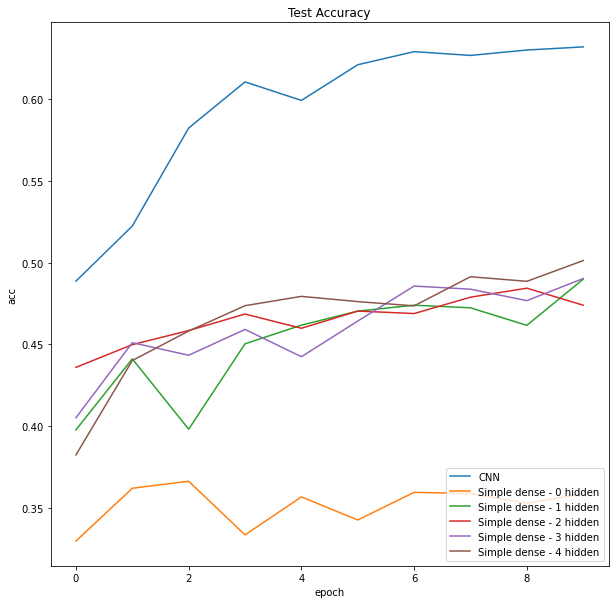

In [153]:
plt.plot(conv_acc,label='CNN')
plt.plot(dense_acc_1,label='Simple dense - 0 hidden')
plt.plot(dense_acc_2,label='Simple dense - 1 hidden')
plt.plot(dense_acc_3,label='Simple dense - 2 hidden')
plt.plot(dense_acc_4,label='Simple dense - 3 hidden')
plt.plot(dense_acc_5,label='Simple dense - 4 hidden')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Test Accuracy')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

## Result of (a)

We can find that CNN is significantly better than others, and the simple DNN with no hidden layer is significantly worse than others.

For CNN, it can find some important features by convolution filters, it keeps some important spatial features. So it can easily have a better performance.

For Simple Dense NN with hidden layers, the performence is not as good as CNN, they have more parameters, need more time for convergence. 

But for 0 hidden layer network, it's just a linear combination with a ReLU function, only input layer and output layer, so it can hardly have good performance. And with the increase of epochs, the accuracy just oscillate around a very low level, because it only has small number of parameters.

# Question (b)

Use Sigmoid function as activation function

In [58]:
class ConvNet2(nn.Module):
    '''
    CNN Model 2
        Same model with the Cifar10 File
        Use Sigmoid FUnction
    '''
    def __init__(self):
        super().__init__()
        '''self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)'''
        self.conv_layers=nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.Sigmoid(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6, 16, 5),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

conv_net_2 = ConvNet2()

In [59]:
'''
Train conv_net_2
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net_2.parameters(), lr=0.001, momentum=0.9)
n_epochs=10
conv_acc_2=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    conv_net_2.to('cuda')
    conv_net_2.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = conv_net_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
    conv_net_2.eval()
    conv_net_2.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = conv_net_2(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_curr=correct / total
    conv_acc_2.append(acc_curr)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.316
[1,  4000] loss: 2.314
[1,  6000] loss: 2.314
[1,  8000] loss: 2.312
[1, 10000] loss: 2.311
[1, 12000] loss: 2.309
Accuracy of the network on the 10000 test images: 10 %
[2,  2000] loss: 2.310
[2,  4000] loss: 2.310
[2,  6000] loss: 2.310
[2,  8000] loss: 2.308
[2, 10000] loss: 2.308
[2, 12000] loss: 2.308
Accuracy of the network on the 10000 test images: 10 %
[3,  2000] loss: 2.307
[3,  4000] loss: 2.307
[3,  6000] loss: 2.306
[3,  8000] loss: 2.305
[3, 10000] loss: 2.306
[3, 12000] loss: 2.306
Accuracy of the network on the 10000 test images: 10 %
[4,  2000] loss: 2.305
[4,  4000] loss: 2.305
[4,  6000] loss: 2.305
[4,  8000] loss: 2.305
[4, 10000] loss: 2.304
[4, 12000] loss: 2.303
Accuracy of the network on the 10000 test images: 10 %
[5,  2000] loss: 2.305
[5,  4000] loss: 2.304
[5,  6000] loss: 2.304
[5,  8000] loss: 2.305
[5, 10000] loss: 2.304
[5, 12000] loss: 2.304
Accuracy of the network on the 10000 test images: 10 %
[6,  2000] loss: 2.304
[6,  4000] l

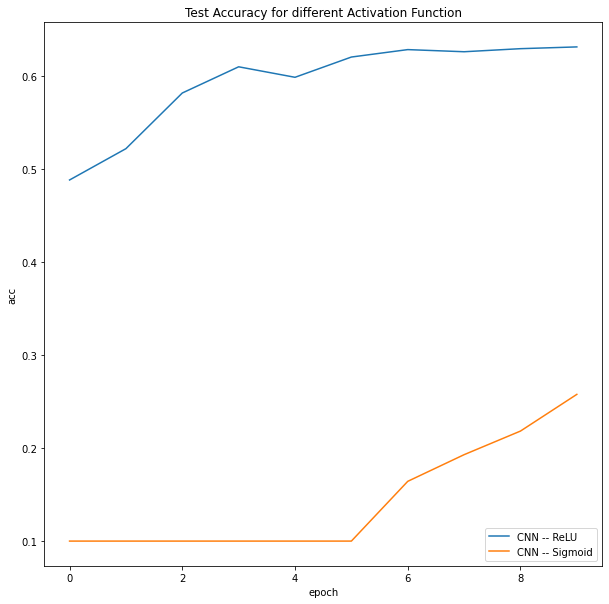

In [148]:
plt.plot(conv_acc,label='CNN -- ReLU')
plt.plot(conv_acc_2,label='CNN -- Sigmoid')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Test Accuracy for different Activation Function')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

## Result of (b)

We find that the performance with ReLU is significantly better than Sigmoid. Because ReLU function has such advantages.

1. ReLU function can behave close to a linear unit.
2. The gradient is large so updating hardly fall in critical points.
3. The computation is very efficient and convergence is faster.

So in this NN, using ReLU is better.

# Question 3

Use Data Augmentation and Dropout

Fisrtly define CNN with dropout.

In [133]:
# Model with drop:
class ConvNet3(nn.Module):
    '''
    CNN Model 3
        Same model with the Cifar10 File
        Add Drop Out
    '''
    def __init__(self):
        super().__init__()
        '''self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)'''
        self.conv_layers=nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout(0.2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

cnn_drop_1=ConvNet3()

In [134]:
cnn_no_drop_1=ConvNet1()
cnn_drop_1=ConvNet3()

In [136]:
'''
Train CNN without Drop out without Data Augmentation
Model name: cnn_no_drop_1
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_no_drop_1.parameters(), lr=0.001, momentum=0.9)
n_epochs=100
tr_acc_nodrop_noaug=[]
tt_acc_nodrop_noaug=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    cnn_no_drop_1.to('cuda')
    cnn_no_drop_1.train()
    running_loss = 0.0
    
    train_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_no_drop_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
        '''
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        '''
    train_acc = sum(train_accs) / len(train_accs)
    tr_acc_nodrop_noaug.append(train_acc.cpu().item())
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tr_acc = {train_acc:.5f}")
    
    cnn_no_drop_1.eval()
    cnn_no_drop_1.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = cnn_no_drop_1(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    tt_acc_nodrop_noaug.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tt_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/100 ] , tr_acc = 0.37442
[ Train | 001/100 ] , tt_acc = 0.48030
[ Train | 002/100 ] , tr_acc = 0.51910
[ Train | 002/100 ] , tt_acc = 0.54280
[ Train | 003/100 ] , tr_acc = 0.57498
[ Train | 003/100 ] , tt_acc = 0.57310
[ Train | 004/100 ] , tr_acc = 0.61154
[ Train | 004/100 ] , tt_acc = 0.59050
[ Train | 005/100 ] , tr_acc = 0.63680
[ Train | 005/100 ] , tt_acc = 0.59890
[ Train | 006/100 ] , tr_acc = 0.65962
[ Train | 006/100 ] , tt_acc = 0.61010
[ Train | 007/100 ] , tr_acc = 0.67222
[ Train | 007/100 ] , tt_acc = 0.62970
[ Train | 008/100 ] , tr_acc = 0.68982
[ Train | 008/100 ] , tt_acc = 0.62780
[ Train | 009/100 ] , tr_acc = 0.70088
[ Train | 009/100 ] , tt_acc = 0.62660
[ Train | 010/100 ] , tr_acc = 0.70950
[ Train | 010/100 ] , tt_acc = 0.64110
[ Train | 011/100 ] , tr_acc = 0.71980
[ Train | 011/100 ] , tt_acc = 0.63020
[ Train | 012/100 ] , tr_acc = 0.72688
[ Train | 012/100 ] , tt_acc = 0.62560
[ Train | 013/100 ] , tr_acc = 0.73268
[ Train | 013/100 ] , tt_

In [137]:
'''
Train CNN with Drop out but without Data Augmentation
Model name: cnn_drop_1
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_drop_1.parameters(), lr=0.001, momentum=0.9)
n_epochs=100
tr_acc_drop_noaug=[]
tt_acc_drop_noaug=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    cnn_drop_1.to('cuda')
    cnn_drop_1.train()
    running_loss = 0.0
    
    train_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_drop_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
        '''
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        '''
    train_acc = sum(train_accs) / len(train_accs)
    tr_acc_drop_noaug.append(train_acc.cpu().item())
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tr_acc = {train_acc:.5f}")
    
    cnn_drop_1.eval()
    cnn_drop_1.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = cnn_drop_1(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    tt_acc_drop_noaug.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tt_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/100 ] , tr_acc = 0.33132
[ Train | 001/100 ] , tt_acc = 0.43720
[ Train | 002/100 ] , tr_acc = 0.45516
[ Train | 002/100 ] , tt_acc = 0.51070
[ Train | 003/100 ] , tr_acc = 0.49176
[ Train | 003/100 ] , tt_acc = 0.54900
[ Train | 004/100 ] , tr_acc = 0.51344
[ Train | 004/100 ] , tt_acc = 0.55310
[ Train | 005/100 ] , tr_acc = 0.52762
[ Train | 005/100 ] , tt_acc = 0.55950
[ Train | 006/100 ] , tr_acc = 0.54092
[ Train | 006/100 ] , tt_acc = 0.58070
[ Train | 007/100 ] , tr_acc = 0.54908
[ Train | 007/100 ] , tt_acc = 0.59800
[ Train | 008/100 ] , tr_acc = 0.55292
[ Train | 008/100 ] , tt_acc = 0.58640
[ Train | 009/100 ] , tr_acc = 0.55734
[ Train | 009/100 ] , tt_acc = 0.58630
[ Train | 010/100 ] , tr_acc = 0.56514
[ Train | 010/100 ] , tt_acc = 0.59240
[ Train | 011/100 ] , tr_acc = 0.56814
[ Train | 011/100 ] , tt_acc = 0.61660
[ Train | 012/100 ] , tr_acc = 0.57256
[ Train | 012/100 ] , tt_acc = 0.61910
[ Train | 013/100 ] , tr_acc = 0.57298
[ Train | 013/100 ] , tt_

### Data Augmentation

Use flip and rotation

In [102]:
transform2 = transforms.Compose(
    [transforms.RandomRotation(2),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform2)
trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset2 = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform2)
testloader2 = torch.utils.data.DataLoader(testset2, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes2 = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


New model: Dropout and No Dropout

In [135]:
cnn_no_drop_2=ConvNet1()
cnn_drop_2=ConvNet3()

In [138]:
'''
Train CNN without Drop out with Data Augmentation
Model name: cnn_no_drop_2
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_no_drop_2.parameters(), lr=0.001, momentum=0.9)
n_epochs=100
tr_acc_nodrop_aug=[]
tt_acc_nodrop_aug=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    cnn_no_drop_2.to('cuda')
    cnn_no_drop_2.train()
    running_loss = 0.0
    
    train_accs = []
    for i, data in enumerate(trainloader2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_no_drop_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
        '''
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        '''
    train_acc = sum(train_accs) / len(train_accs)
    tr_acc_nodrop_aug.append(train_acc.cpu().item())
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tr_acc = {train_acc:.5f}")
    
    cnn_no_drop_2.eval()
    cnn_no_drop_2.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader2:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = cnn_no_drop_2(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    tt_acc_nodrop_aug.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tt_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/100 ] , tr_acc = 0.36534
[ Train | 001/100 ] , tt_acc = 0.50050
[ Train | 002/100 ] , tr_acc = 0.52046
[ Train | 002/100 ] , tt_acc = 0.55810
[ Train | 003/100 ] , tr_acc = 0.57138
[ Train | 003/100 ] , tt_acc = 0.56180
[ Train | 004/100 ] , tr_acc = 0.60120
[ Train | 004/100 ] , tt_acc = 0.60220
[ Train | 005/100 ] , tr_acc = 0.61952
[ Train | 005/100 ] , tt_acc = 0.60380
[ Train | 006/100 ] , tr_acc = 0.63846
[ Train | 006/100 ] , tt_acc = 0.61200
[ Train | 007/100 ] , tr_acc = 0.64964
[ Train | 007/100 ] , tt_acc = 0.63020
[ Train | 008/100 ] , tr_acc = 0.66102
[ Train | 008/100 ] , tt_acc = 0.62110
[ Train | 009/100 ] , tr_acc = 0.67050
[ Train | 009/100 ] , tt_acc = 0.64570
[ Train | 010/100 ] , tr_acc = 0.67762
[ Train | 010/100 ] , tt_acc = 0.64500
[ Train | 011/100 ] , tr_acc = 0.68616
[ Train | 011/100 ] , tt_acc = 0.64020
[ Train | 012/100 ] , tr_acc = 0.68834
[ Train | 012/100 ] , tt_acc = 0.63490
[ Train | 013/100 ] , tr_acc = 0.69168
[ Train | 013/100 ] , tt_

In [139]:
'''
Train CNN with Drop out with Data Augmentation
Model name: cnn_drop_2
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_drop_2.parameters(), lr=0.001, momentum=0.9)
n_epochs=100
tr_acc_drop_aug=[]
tt_acc_drop_aug=[]
for epoch in range(n_epochs):  # loop over the dataset multiple times
    cnn_drop_2.to('cuda')
    cnn_drop_2.train()
    running_loss = 0.0
    
    train_accs = []
    for i, data in enumerate(trainloader2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_drop_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
        '''
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        '''
    train_acc = sum(train_accs) / len(train_accs)
    tr_acc_drop_aug.append(train_acc.cpu().item())
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tr_acc = {train_acc:.5f}")
    
    cnn_drop_2.eval()
    cnn_drop_2.cpu()
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader2:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = cnn_drop_2(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    tt_acc_drop_aug.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] , tt_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/100 ] , tr_acc = 0.32558
[ Train | 001/100 ] , tt_acc = 0.45350
[ Train | 002/100 ] , tr_acc = 0.44556
[ Train | 002/100 ] , tt_acc = 0.49360
[ Train | 003/100 ] , tr_acc = 0.47956
[ Train | 003/100 ] , tt_acc = 0.54510
[ Train | 004/100 ] , tr_acc = 0.50200
[ Train | 004/100 ] , tt_acc = 0.52740
[ Train | 005/100 ] , tr_acc = 0.51988
[ Train | 005/100 ] , tt_acc = 0.56850
[ Train | 006/100 ] , tr_acc = 0.53068
[ Train | 006/100 ] , tt_acc = 0.57590
[ Train | 007/100 ] , tr_acc = 0.54118
[ Train | 007/100 ] , tt_acc = 0.57930
[ Train | 008/100 ] , tr_acc = 0.55010
[ Train | 008/100 ] , tt_acc = 0.58200
[ Train | 009/100 ] , tr_acc = 0.55744
[ Train | 009/100 ] , tt_acc = 0.61730
[ Train | 010/100 ] , tr_acc = 0.56022
[ Train | 010/100 ] , tt_acc = 0.59840
[ Train | 011/100 ] , tr_acc = 0.56540
[ Train | 011/100 ] , tt_acc = 0.60560
[ Train | 012/100 ] , tr_acc = 0.56916
[ Train | 012/100 ] , tt_acc = 0.61730
[ Train | 013/100 ] , tr_acc = 0.57416
[ Train | 013/100 ] , tt_

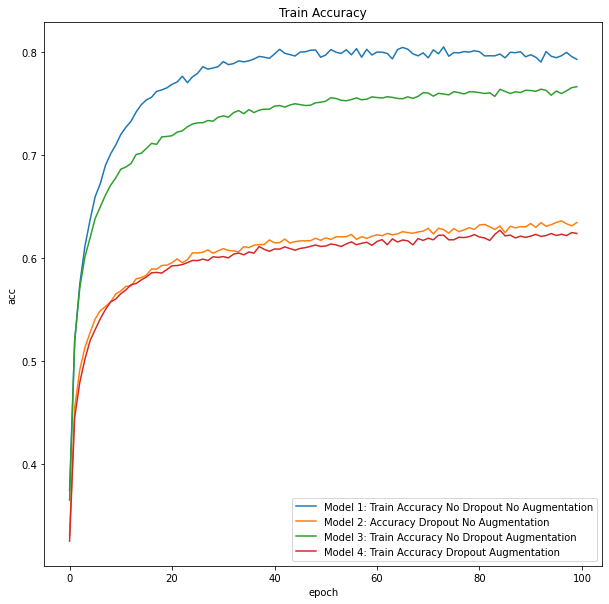

In [146]:
plt.plot(tr_acc_nodrop_noaug,label='Model 1: Train Accuracy No Dropout No Augmentation')
plt.plot(tr_acc_drop_noaug,label='Model 2: Accuracy Dropout No Augmentation')
plt.plot(tr_acc_nodrop_aug,label='Model 3: Train Accuracy No Dropout Augmentation')
plt.plot(tr_acc_drop_aug,label='Model 4: Train Accuracy Dropout Augmentation')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Train Accuracy')
plt.legend(loc="lower right")
plt.show()

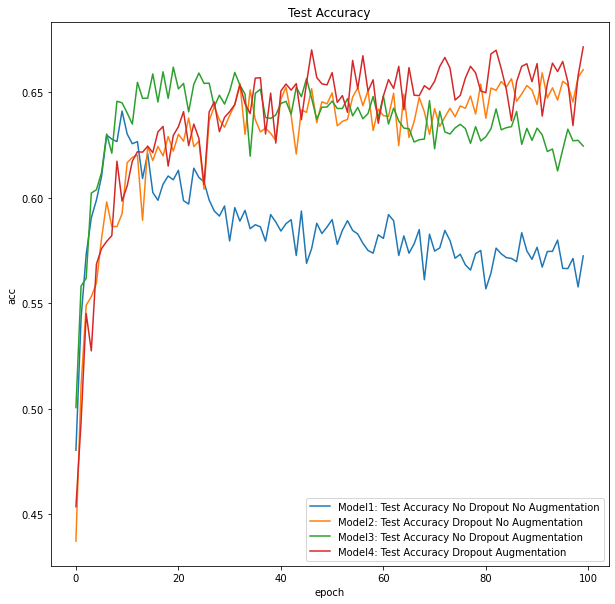

In [147]:
plt.plot(tt_acc_nodrop_noaug,label='Model1: Test Accuracy No Dropout No Augmentation')
plt.plot(tt_acc_drop_noaug,label='Model2: Test Accuracy Dropout No Augmentation')
plt.plot(tt_acc_nodrop_aug,label='Model3: Test Accuracy No Dropout Augmentation')
plt.plot(tt_acc_drop_aug,label='Model4: Test Accuracy Dropout Augmentation')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Test Accuracy')
plt.legend(loc="lower right")
plt.show()

## Result of Question (c)

### For the Training Accuracy:
    We find:
1. All curves keep increasing, and after about 40 epochs, they trend to convergence. But they never decrease.
2. Compare 4 curves, we find if we don't add dropout the train accuracy can be better.
3. The train accuracy with no augmentation is a little better than after augmentation.
    
        The Reason:
1. Train accuracy use same data with training, we don't need to consider overfitting. So it will keep increasing and then oscillate, but can hardly have large decrease.
2. Dropout is always used in very deep networks. But here we only have two convolutional layers and three fully connected layers. And we don't need to consider about overfitting, so more information will give use a higher accuracy.
3. I add Flip and Rotation for data augmentation, so we may have more spatial features. But the convolutional layers are shallow and no too much filters. So data augmentation doesn't develop the performance on train set.
### For the Testing Accuracy:
    We find:
1. The curve without Dropout and without Augmentation start decreasing after about 20 epochs. The curve without Dropout but with Augmentation start decreasing after about 30 epochs. Both of these two curves increase much faster than the other two curves. And the data augmentation can improve the performance.
2. The two curves with Dropout increase slowerly at beginning. But they don't show the trendency of decreasing, and have a higher accuracy at last. And the data augmentation only have a little help to the result.
        The Reason:
1. The decreasing means the models meet overfitting after 20/30 epochs. Because the testset is not same as train set, so too low loss always on train set always means overfitting.
2. The dropout in these two models increase the generality of model. We use less information to avoid overfitting, so it can have better performance when apply to test set.
3. The data augmentation mainly improve the test accuracy on these two overfitting models. Because data augmentation give us more features, so can decrease the influence of overfitting.